# Beispiel Datenanalyse

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set(style = "darkgrid")
sns.set(rc = {"figure.figsize" : (16, 5)})
sns.set(rc={'font.size':12})

In [3]:
data = pd.read_csv('https://github.com/jenfly/opsd/raw/master/opsd_germany_daily.csv')

In [11]:
data

Consumption [GWh]  Wind [GWh]  Solar [GWh]  Wind+Solar [GWh]
Date                                                                    
2006-01-01         1069.18400         NaN          NaN               NaN
2006-01-02         1380.52100         NaN          NaN               NaN
2006-01-03         1442.53300         NaN          NaN               NaN
2006-01-04         1457.21700         NaN          NaN               NaN
2006-01-05         1477.13100         NaN          NaN               NaN
...                       ...         ...          ...               ...
2017-12-27         1263.94091     394.507       16.530           411.037
2017-12-28         1299.86398     506.424       14.162           520.586
2017-12-29         1295.08753     584.277       29.854           614.131
2017-12-30         1215.44897     721.247        7.467           728.714
2017-12-31         1107.11488     721.176       19.980           741.156

[4383 rows x 4 columns]

In [5]:
data.set_index('Date', inplace=True)

In [9]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [8]:
data.index = pd.to_datetime(data.index)

In [10]:
for name in data.columns:
    data.rename(columns={name:name+' [GWh]'}, inplace=True)

<AxesSubplot:xlabel='Date'>

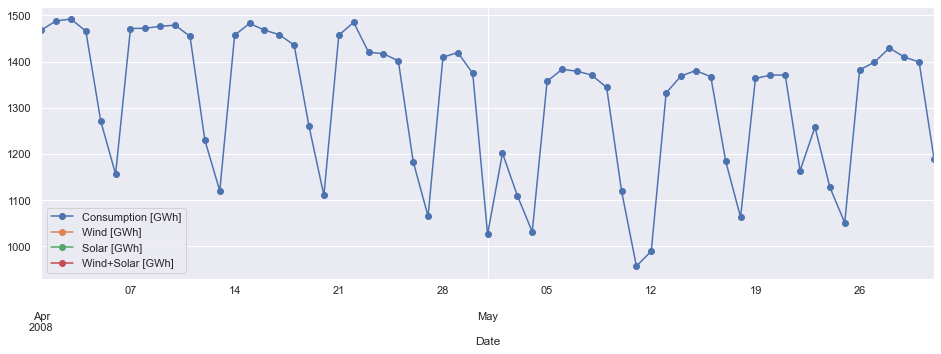

In [15]:
data.loc['2008-04':'2008-05'].plot(marker='o')

In [18]:
weekdays = [0,1,2,3,4,5,6]

p_mean_days = []

for i in weekdays:
    filt = (data.index.weekday == i)
    p_mean = data.loc[filt, 'Solar [GWh]'].mean()
    p_mean_days.append(p_mean)

Text(0, 0.5, 'Energie [GWh]')

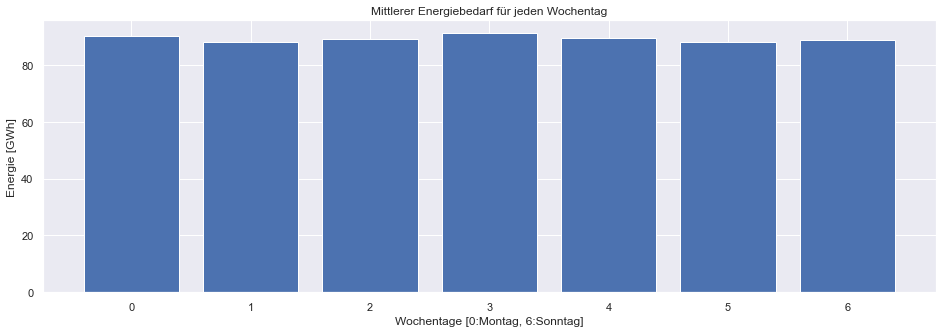

In [19]:
plt.bar(weekdays, p_mean_days)
plt.title('Mittlerer Energiebedarf für jeden Wochentag')
plt.xlabel('Wochentage [0:Montag, 6:Sonntag]')
plt.ylabel('Energie [GWh]')

In [20]:
yearly_data = data.resample('a').sum()/1000

In [21]:
yearly_data

Consumption [GWh]  Wind [GWh]  Solar [GWh]  Wind+Solar [GWh]
Date                                                                    
2006-12-31         489.068536    0.000000     0.000000          0.000000
2007-12-31         496.631847    0.000000     0.000000          0.000000
2008-12-31         495.570876    0.000000     0.000000          0.000000
2009-12-31         459.737428    0.000000     0.000000          0.000000
2010-12-31         488.588700   35.911777     0.000000          0.000000
2011-12-31         484.814086   44.032951     0.000000          0.000000
2012-12-31         469.574754   45.862667    27.887332         73.749999
2013-12-31         463.336853   47.197832    29.559780         76.697443
2014-12-31         504.164821   51.107672    32.498307         83.370502
2015-12-31         505.264563   77.468994    34.907138        112.376132
2016-12-31         505.927354   77.008126    34.562824        111.570950
2017-12-31         504.736369  102.667365    35.882643        138.550008

(0.0, 600.0)

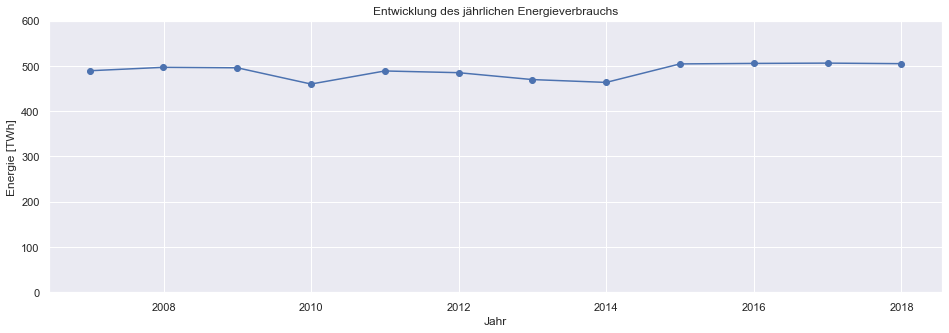

In [23]:
plt.plot(yearly_data['Consumption [GWh]'], marker = 'o')
plt.title('Entwicklung des jährlichen Energieverbrauchs')
plt.xlabel('Jahr')
plt.ylabel('Energie [TWh]')
plt.ylim(0, 600)